In [1]:
from circuit_finder.patching.eap_graph import EAPGraph

import pickle 

graph = pickle.load(open("../examples/graph.pkl", "rb"))
print(graph)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from circuit_finder.core.types import parse_node_name

G = nx.DiGraph()
for dest, src in graph.get_edges():
    if dest != "null":
        G.add_edge(src, dest)

print(G.nodes)

['attn.0.4.5263', 'attn.1.4.4734', 'mlp.0.2.13881', 'mlp.0.4.5545', 'attn.10.14.3849', 'attn.9.14.11368', 'mlp.1.4.12820', 'mlp.1.4.20449', 'mlp.2.4.21793', 'mlp.3.4.11805', 'mlp.3.4.18695', 'mlp.3.4.3104', 'mlp.4.4.12781', 'mlp.5.4.6255', 'mlp.6.4.22620', 'mlp.7.4.12771', 'mlp.8.4.3750', 'mlp.9.4.13544', 'attn.0.2.9715', 'attn.3.4.18319', 'mlp.1.2.5913', 'mlp.2.2.7897', 'mlp.0.10.13881', 'mlp.3.4.13400', 'mlp.5.4.3821', 'mlp.5.4.645', 'mlp.5.4.9019', 'mlp.6.4.16515', 'mlp.7.4.2739', 'mlp.8.4.23192', 'metric.12.14.0', 'mlp.0.4.9713']


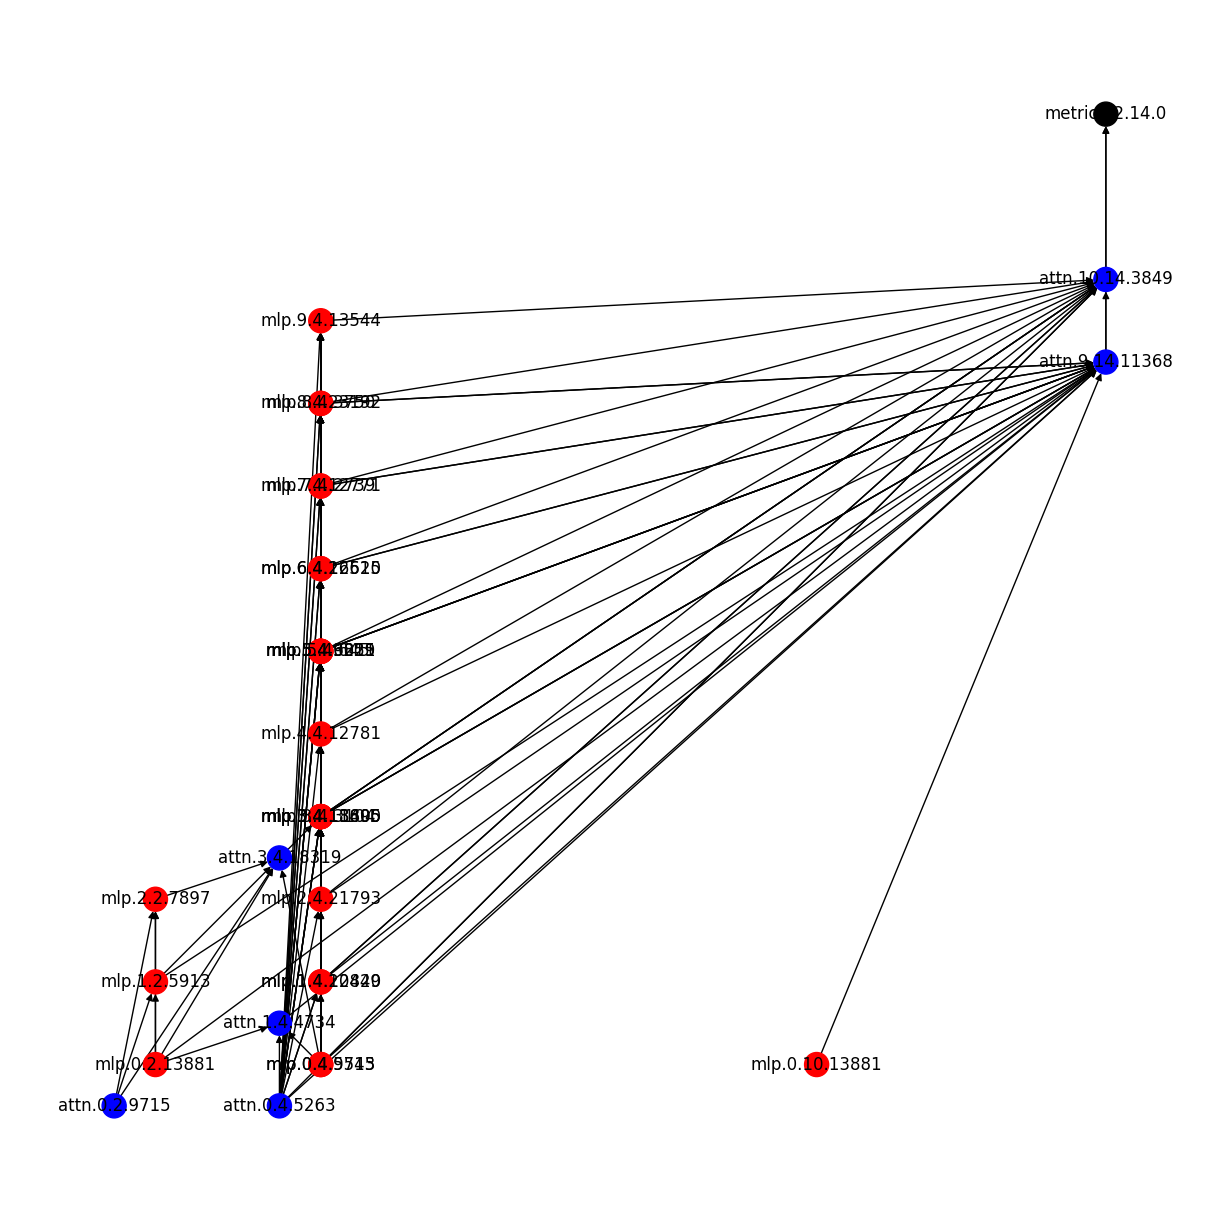

In [3]:
def get_node_position(
    node_name: str,
) -> tuple[float, float]:
    module, layer, token, feature = parse_node_name(node_name)
    x, y = token, layer
    if module == "mlp":
        x += 0.5
        y += 0.5
    return (x, y)


def get_node_color(
    node_name: str,
) -> str:
    module, layer, token, feature = parse_node_name(node_name)
    if module == "mlp":
        return "red"
    elif module == "attn":
        return "blue"
    else:
        return "black"


pos = {node: get_node_position(node) for node in G.nodes}
color = [get_node_color(node) for node in G.nodes]

plt.figure(3, figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color=color)
plt.show()